# Imports

In [1]:
import os
from pydub import AudioSegment
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Loading data

In [2]:
main_directory = os.getcwd() + "\\datasets\\trump\\wavs\\"
audio_lengths = []

files = [f for f in os.listdir(main_directory) if os.path.isfile(os.path.join(main_directory, f))]
for f in files:
    audio = AudioSegment.from_file(main_directory + f)
    audio_lengths.append(audio.duration_seconds)

In [3]:
data = pd.DataFrame(audio_lengths, columns=["Length"])
data.head()

,Length
0,9.605896
1,5.462902
2,3.441905
3,11.938912
4,6.029932


In [4]:
data["Length"].describe()

count    141.000000
mean       7.352096
std        3.053480
min        2.381905
25%        5.294875
50%        7.177868
75%        9.206893
max       16.828889
Name: Length, dtype: float64

# Dataset length (s)

In [5]:
data_audio = data["Length"].sum()
data_audio_formatted = '{} hours {} minutes {} seconds'.format(
    round(data_audio / 3600), 
    round((data_audio % 3600) / 60),
    round((data_audio % 3600) % 60, 1))
print("Total dataset length:", data_audio_formatted)

Total dataset length: 0 hours 17 minutes 16.6 seconds


Text(0.5, 1.0, 'Histogram of audio file lengths in trump dataset')

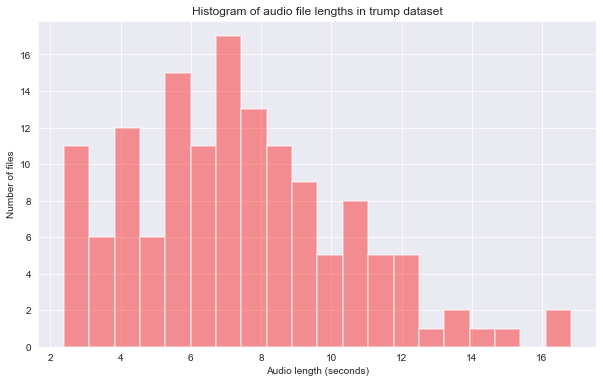

In [6]:
plt.figure(figsize=(10, 6))
sns.set_style("darkgrid")
sns.distplot(data["Length"], bins=20, kde=False, hist_kws={"linewidth": 2, "color": "r"})
plt.xlabel("Audio length (seconds)")
plt.ylabel("Number of files")
plt.title("Histogram of audio file lengths in trump dataset")